<a href="https://colab.research.google.com/github/JoshuaUgarte/CLASETHC/blob/Trabajo-en-clase/clase%209nov23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)


In [7]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [9]:
cuantos = df.groupby('Country').size().reset_index(name='conteo')
cuantos

,Country,conteo
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


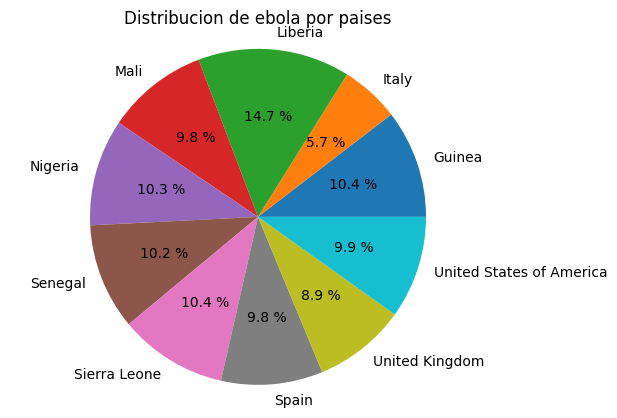

In [12]:
plt.pie(cuantos['conteo'],labels=cuantos['Country'],autopct='%0.1f %%')
plt.axis("equal")#mantener ejes iguales, orizontal o vertical
plt.title("Distribucion de ebola por paises")
plt.savefig("Pastel_paises.png",dpi=300, format='png')
plt.show()

In [16]:
SL=df[df['Country']=='Sierra Leone']

In [17]:
mean_values=SL['No. of confirmed cases'].mean()

In [18]:
SL.fillna(mean_values,inplace=True)

<ipython-input-18-6658fb61a808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL.fillna(mean_values,inplace=True)


SL.isnull().sum()

In [21]:
SL[15:20]#ASI DEBE SER NUESTRA BASE DEL PROYECTO

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
22/10/2014,Sierra Leone,3223,986.000000,1933.8,1289.2,580.14,386.76,1160.28,773.52,193.38,128.92
25/10/2014,Sierra Leone,3389,1008.000000,2033.4,1355.6,610.02,406.68,1220.04,813.36,203.34,135.56
29/10/2014,Sierra Leone,3700,7883.671815,2220.0,1480.0,666.00,444.00,1332.00,888.00,222.00,148.00
31/10/2014,Sierra Leone,3778,7883.671815,2266.8,1511.2,680.04,453.36,1360.08,906.72,226.68,151.12
05/11/2014,Sierra Leone,4057,893.000000,2434.2,1622.8,730.26,486.84,1460.52,973.68,243.42,162.28


In [22]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]#crea una variable para los NCC, del primer dato hasta el ultimo de 10 en 10
NCD=SL['No. of confirmed deaths'][0:-1:10]#""""

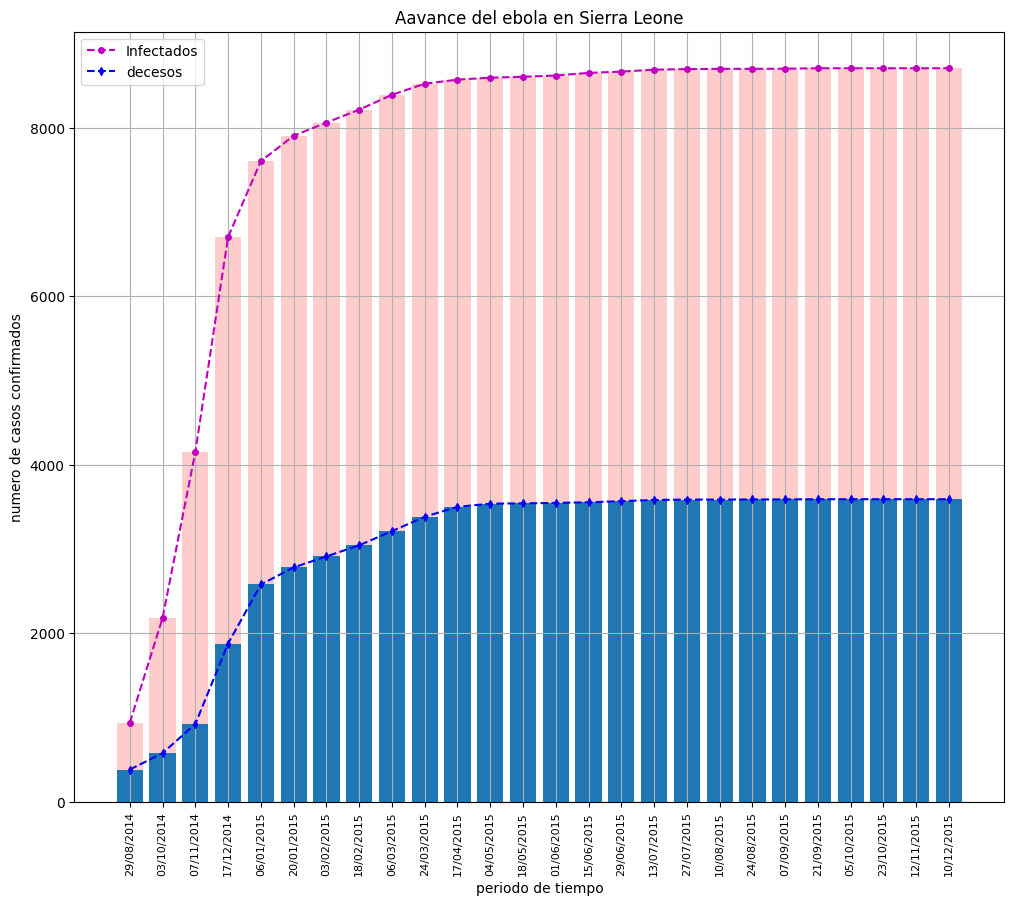

In [38]:
fig=plt.figure(figsize=(12,10))
plt.bar(Dates,NCC,color='red',alpha=0.2)
plt.plot(Dates,NCC,'o--m',ms=4,label='Infectados')
plt.plot(Dates,NCD,'d--b',ms=4,label='decesos')
plt.bar(Dates,NCD)
plt.grid()
plt.title('Aavance del ebola en Sierra Leone')#titulo
plt.xlabel('periodo de tiempo')#etiqueta eje x
plt.ylabel('numero de casos confirmados')#etiqueta en eje y
plt.xticks(rotation=90,fontsize=8)
plt.legend()#cuadro de info
plt.savefig("barras_ncc,nmc.png",dpi=300, format='png')
plt.show()

In [39]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
SL['PIvsD']=PIvsD

<ipython-input-39-8a18c4adbf83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['PIvsD']=PIvsD


In [40]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290


In [ ]:
recuperados=((100-PIvsD))/100*SL['No. of confirmed cases']
SL['recuperados']=recuperados

In [42]:
SL['PR']=(100-PIvsD)

<ipython-input-42-b3713d504f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL['PR']=(100-PIvsD)


In [44]:
PIvsD_mean=SL['PIvsD'].mean()
PR_mean=SL['PR'].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=['PIvsD','PR']

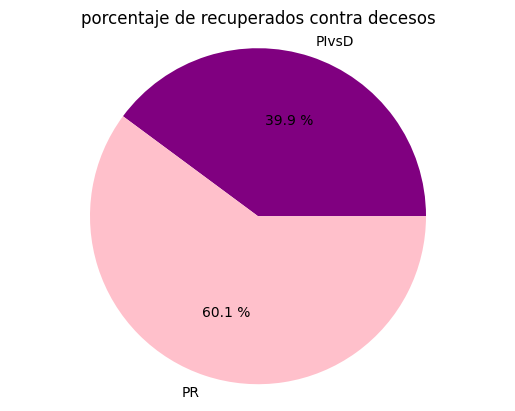

In [46]:
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%',colors=['purple','pink'])
plt.axis("equal")#mantener ejes iguales, orizontal o vertical
plt.title("porcentaje de recuperados contra decesos")
plt.savefig("grafica de porcentaje de decesos contra recuperados.png",dpi=300, format='png')
plt.show()